# The Stroop Effect
### Inferential Statistics Project - Andras Somi

In this report I analyse a sample of users who completed the test for the Stroop Effect, and examine the relationship of the incongruence between the meaning and the color of the words and the time needed to finish naming the colors in the list of words.

In [110]:
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [111]:
# Load dataset
data = pd.read_csv('stroopdata.csv')

## 1. What is our independent variable? What is our dependent variable?

In this experiment we want to test whether a disconnection between the color of the letters and the meaning of the word makes it more difficult to call out the color of the letters. The operational definition for this difficulty is the time it takes to name the color.

Therefore our independent variable is the congruence between the word and the color of the ink, while our dependent variable is the time it takes to correctly pronounce the color of the ink of the words.

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The null-hypothesis is that the time it takes to pronounce the color of the ink does not differ between congruent and incongruent setups, while the alternative hypothesis is that it takes more time to call the color when it is incongruent with the meaning of the word.

$H_0: \mu_{cong} = \mu_{incong}$,

$H_A: \mu_{cong} < \mu_{incong}$,

_where $\mu_{cong}$: mean time on congruent list, and $\mu_{incong}$: mean time on incongruent list._

To test these hypotheses we need to perform a __one-sided t-Test of dependent variables.__

1. The samples are dependent, paired samples, as each subject had to make two entries, one under each condition. This makes this test a 'whithin-subject' test. 
2. I also formulated the alternative hypothesis as the times under incongruent condition are _larger_ than under the other condition. Therefore we need a one-sided test to be able to reject $H_0$.

## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [112]:
# Add series for the difference between times for each subject
data['Diff'] = data['Incongruent'] - data['Congruent']

__Congruent:__

The values of the 24 observations fall in the range between 8.63 and 22.33 seconds, with a mean of 14.05 seconds, while the median is 14.36 seconds. The inter-quartile range is between 11.9 and 16.2 seconds.

The standard deviation of the congruent observations is 3.56 seconds.

__Incongruent:__

The values of the 24 observations fall in the range between 15.69 and 32.26 seconds, with a mean of 22.02 seconds, while the median is 21.02 seconds. The inter-quartile range is between 18.72 and 24.05 seconds.

The standard deviation of the incongruent observations is 4.8 seconds.

__Difference:__

All 24 subjects reported higher times for the incongruent list than the congruent list within the range between 1.95 seconds and 21.92 seconds. The mean and median difference is 7.96 seconds and 7.67 seconds, respectively.

The standard deviation of the difference between recorded times is 4.86 seconds.

In [113]:
data.describe()

,Congruent,Incongruent,Diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


__Correlations:__

Correlation between congruent and incongruent time is light positive, meaning those subject who spend more time on the first list tend to spend somewhat more time on the second list, too. 

In the meantime the correlation between the congruent times and the differences between the two recorded times is negative, meaning that the subjects spending more time on the first list tend to use less 'extra' time for finishing the other list.

In [114]:
data.corr()

,Congruent,Incongruent,Diff
Congruent,1.000000,0.35182,-0.384733
Incongruent,0.351820,1.00000,0.728660
Diff,-0.384733,0.72866,1.000000


## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

The 'typical' time for the congruent words is around 14 seconds, but there is a secondary peak around 10 seconds. The 'typical' incongruent time is around 21 seconds, while the peak of the difference distribution is around 8 seconds.

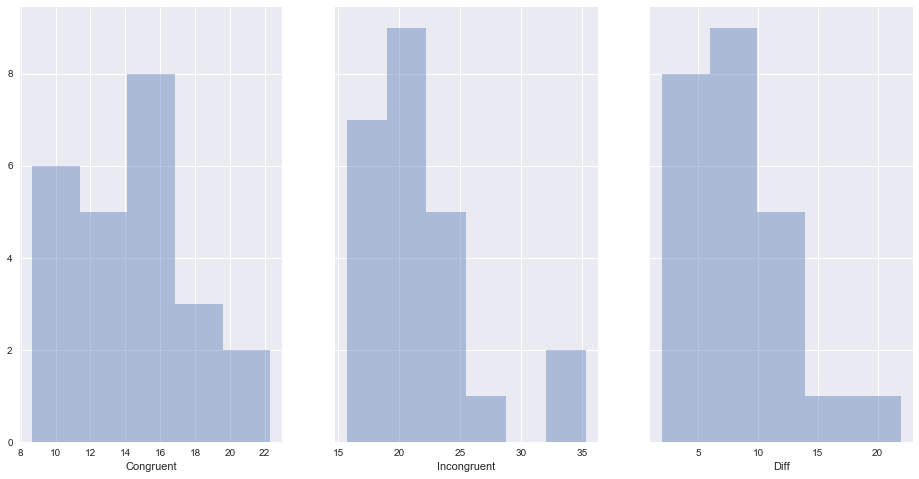

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16,8))
sns.distplot(data['Congruent'], ax=ax1, kde=False)
sns.distplot(data['Incongruent'], ax=ax2, kde=False)
sns.distplot(data['Diff'], ax=ax3, kde=False)

The scatterplot reflects the positive correlation between congruent and incongruent times, but the slope of the regression line is lower than 1. This means that the difference between the two values is tend to diminish as the congruent time grows, just as the plot on the right suggests.

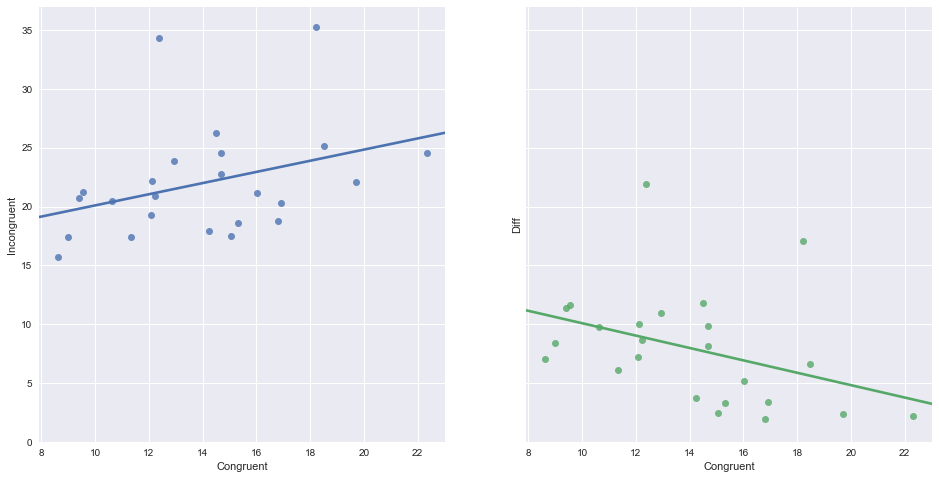

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(16,8))
sns.regplot(data=data, x='Congruent', y='Incongruent', ax=ax1, ci=False)
sns.regplot(data=data, x='Congruent', y='Diff', ax=ax2, ci=False)

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [117]:
# Calculate t-statistic with SciPy for the difference between Incongruent and Congruent being 0
t_stat = stats.ttest_rel(data['Incongruent'], data['Congruent'])
print(t_stat)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)


In [118]:
# Calculate one-sided critical t-value for alpha=0.05
t_critical = stats.t.ppf(1-0.05, data.shape[0]-1)
print(t_critical)

1.71387152775


In [119]:
# Calculate 95% CI for mean difference
margin_err = t_critical * data['Diff'].std() / math.sqrt(data.shape[0])
ci = (data['Diff'].mean() - margin_err, data['Diff'].mean() + margin_err)
print(ci)

(6.2628681632825467, 9.6667151700507858)


### Results

There was a significant effect for incongruence _t(23) = 8.02, p < .001_, for the incongruent list taking more time to finish.

Confidence interval for the mean difference in seconds _95% CI = (6.26, 9.67)_

We can reject $H_0$ and accept $H_1$, as the t-statistic is well over the one-sided critical t-value for the chosen alpha level (5%). The t-statistic is actually so high that the associated p-value falls far below .001, so the result is statistically significant with even lower alpha levels.

This actually confirms my previous expectation. My times were 13.267s for the congruent and 19.902s for the incongruent lists, and besides the reasonably higher time I felt that the second list requires much more effort to finish. This made the assumption that the incongruent list takes more time on average plausible.

## References

1. Scipy Stats documentation: [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)
2. Seaborn documentation: [https://seaborn.pydata.org/index.html](https://seaborn.pydata.org/index.html)
3. Matplotlib documentation: [https://matplotlib.org/api/pyplot_api.html](https://matplotlib.org/api/pyplot_api.html)
4. Reporting Statistics in APA Style [http://my.ilstu.edu/~jhkahn/apastats.html](http://my.ilstu.edu/~jhkahn/apastats.html)